## Importing the Libraries

In [1]:
import numpy as np # To create n-dimensional arrays in its functionality
import pandas as pd # To read and create dataframe for the dataset
import matplotlib.pyplot as plt # To plot the graphs

## Getting the Dataset

In [2]:
# Reading the file
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'UTF-8')
df = dataset.copy() # Just a another dataframe to so that we can get back our original dataframe if required

## Solution for the Problem

In [3]:
# Function f() is used to sort the list on the basis of frequency rather than string
def f(x):
    return x[1]
investors_data = np.array(df.InvestorsName) # List of all the investors [a, b, c and d] [c,d]

investors = []
for inv in investors_data:
    if inv != np.nan: # Some rows in dataset were empty
        # Since each row in InvestorName contain more than one investor that's why we need
        # to seperate each investor in using split() function based on the character to seperate
        # as per my observation each investor has been seperated using ', ', ' and ' and ','. 
        x = str(inv).split(', ') 
        for y in x:
            z = y.split(' and ')
            for k in z:
                a = k.split(',')
                for i in a:
                    if 'Undisclosed' not in i: # As told above we need to ignore Undisclosed Investor
                        investors.append(i)
investors = np.array(investors)
# np.unique() function helps in seperate out unique values from investors as latter may contain multiple values
inv = np.unique(investors) 
invfreq = []
# Since inv contain only unique values, we can find indices where value in inv is present in investors
# and we need the frequency we can get it using len() function
for i in inv:
    x = len(np.where(investors == i)[0])
    invfreq.append([i,x])
# Sort() function used to sort the invfreq list into descending order using reverse = True
# and key is set to function f which returns frequency of each investor so that
# it can be sorted as per frequency rather than string.
invfreq.sort(key = f, reverse = True)
invest = []
times = []
# Storing top 5 investors and their frequency
for i in range(5):
    invest.append(invfreq[i][0]) 
    times.append(invfreq[i][1])

## Plotting the Graphs

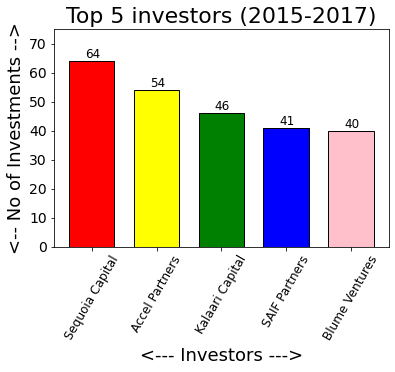

In [4]:
plt.bar(invest, times, width = 0.7, color = ['red', 'yellow', 'green', 'blue', 'pink'], edgecolor = 'black')
for i in range(5):
    # text() function is used to write text on the x-y plane of the graph
    plt.text(i-0.1, times[i]+1, times[i], fontsize = 12)
plt.xlabel('<--- Investors --->', fontsize = 18)
plt.ylabel('<-- No of Investments -->', fontsize = 18)
plt.ylim(0, 75)
# rotation parameter is used so that investors name in the x-axis
# do not coincide
plt.xticks(rotation = 60, fontsize = 12)
plt.yticks(fontsize = 14)
plt.title('Top 5 investors (2015-2017)', fontsize = 22)
plt.show()